<a href="https://colab.research.google.com/github/USMS-FPK-IA-GI-2025/controle-01-numpy-and-matplotlib-iris-saadchamsi/blob/main/exercices/exercices-pratiques-scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction à Scipy — CALCULS SCIENTIFIQUES ET OUTILS D'ANALYSE AVANCÉE EN PYTHON
_Master IA-GI — Notebook 3 : Exercices Pratiques_

> **But du notebook** : Maîtriser les outils de calcul scientifique et d'analyse avancée avec Scipy en Python (2025)<br>
> **Module** : *Python pour les Sciences de Données* – Master 1
> <br>**Basé sur** [le support de cours](https://fr.slideshare.net/slideshow/introduction-a-scipy-calcul-scientifique-et-analyse-avancee-en-python/284636885) de **Youssouf EL ALLIOUI** – FPK USMS

**Objectifs :**
- Appliquer les constantes scientifiques et effectuer des calculs physiques précis avec `scipy.constants`
- Résoudre des problèmes d'optimisation réels (ajustement de courbes, minimisation) avec `scipy.optimize`
- Maîtriser l'interpolation de données expérimentales avec `scipy.interpolate`
- Réaliser des analyses statistiques rigoureuses (tests d'hypothèses, corrélations) avec `scipy.stats`
- Manipuler efficacement les matrices creuses et analyser des graphes avec `scipy.sparse`
- Exploiter les algorithmes spatiaux (KDTree, Voronoi, enveloppe convexe) avec `scipy.spatial`
- Traiter et filtrer des signaux numériques avec la FFT via `scipy.signal` et `scipy.fftpack`
- Appliquer les techniques de traitement d'images (morphologie, filtrage) avec `scipy.ndimage`
- Développer un pipeline complet de classification avec `scipy.datasets`

**Structure du notebook :**
- **Chapitre 1** : 3 exercices sur les bases (constants, optimize, interpolate)
- **Chapitre 2** : 3 exercices sur les structures avancées (stats, sparse, spatial)
- **Chapitre 3** : 3 exercices sur les applications (signal, ndimage, mini-projet intégratif)

**Prérequis :**
- Connaissance de base en Python (NumPy, Matplotlib)
- Notions mathématiques : algèbre linéaire, statistiques descriptives, analyse de Fourier

**Consignes générales :**
- Exécutez les cellules dans l'ordre
- Commentez votre code de manière claire
- Créez des visualisations lisibles avec titres et légendes
- Analysez et interprétez vos résultats
- N'hésitez pas à consulter la documentation officielle : https://docs.scipy.org/

**Niveau :** Master 1 Intelligence Artificielle et Génie Informatique

**Contact :** y.elallioui@usms.ma

# CHAPITRE 1 : Introduction à SciPy et manipulation scientifique de base


## Exercice 1.1 : Calculs physiques avec scipy.constants & conversions
**Niveau : ⭐ Débutant**

### Énoncé
Vous travaillez sur un projet de simulation physique. Créez un programme qui calcule :

1. L'énergie d'un photon de lumière bleue (λ = 450 nm) en joules et en électron-volts
   - Formule : E = h × c / λ
   - h : constante de Planck, c : vitesse de la lumière

2. La force gravitationnelle entre la Terre et la Lune
   - Formule : F = G × (m₁ × m₂) / r²
   - Masse Terre : 5.972e24 kg, Masse Lune : 7.342e22 kg
   - Distance : 384,400 km

3. Convertir une pression de 2.5 atmosphères en :
   - Pascals
   - PSI (pounds per square inch)
   - Bars

### Indices
- Utilisez `scipy.constants` pour toutes les constantes
- La distance doit être convertie en mètres
- Affichez les résultats avec 3 décimales significatives


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import constants
from scipy.optimize import curve_fit, minimize
from scipy.interpolate import interp1d

plt.style.use("seaborn-v0_8")

lambda_m = 450e-9  # m

E_joule = constants.h * constants.c / lambda_m
E_ev = E_joule / constants.e

print(f"Énergie du photon : {E_joule:.3e} J")
print(f"Énergie du photon : {E_ev:.3f} eV")

m_terre = 5.972e24
m_lune = 7.342e22
distance = 384_400e3  # m

F = constants.G * m_terre * m_lune / distance**2
print(f"Force gravitationnelle Terre–Lune : {F:.3e} N")

P_atm = 2.5

P_pa = P_atm * constants.atm
P_psi = P_pa / constants.psi
P_bar = P_pa / 1e5

print(f"{P_atm} atm = {P_pa:.2f} Pa")
print(f"{P_atm} atm = {P_psi:.2f} PSI")
print(f"{P_atm} atm = {P_bar:.2f} bar")


Énergie du photon : 4.414e-19 J
Énergie du photon : 2.755 eV
Force gravitationnelle Terre–Lune : 1.980e+20 N
2.5 atm = 253312.50 Pa
2.5 atm = 36.74 PSI
2.5 atm = 2.53 bar


## Exercice 1.2 : Calculs physiques avec scipy.constants & conversions
**Niveau : ⭐ Débutant**

### Énoncé

Cet exercice vous familiarise avec le module `scipy.constants`.

**Tâches :**

1. **Conversions d'unités :** En utilisant `scipy.constants`, calculez :
   - Combien de mètres dans 5 miles ?
   - Combien de secondes dans 2.5 jours ?
   - Combien de Pascals dans 3 atmosphères ?
   - Combien de Joules dans 500 calories ?

2. **Calcul physique :**
   - La vitesse de la lumière est disponible via `constants.c`
   - Calculez le temps (en secondes) que met la lumière pour parcourir la distance Terre-Soleil (1 unité astronomique, disponible via `constants.au`)

3. **Affichage formaté :**
   - Affichez tous les résultats avec des messages explicatifs
   - Arrondissez les valeurs à 2 décimales quand approprié

In [3]:
# Conversions
miles_to_m = 5 * constants.mile
days_to_sec = 2.5 * constants.day
atm_to_pa = 3 * constants.atm
cal_to_j = 500 * constants.calorie

print(f"5 miles = {miles_to_m:.2f} m")
print(f"2.5 jours = {days_to_sec:.2f} s")
print(f"3 atm = {atm_to_pa:.2f} Pa")
print(f"500 calories = {cal_to_j:.2f} J")

temps = constants.au / constants.c
print(f"Temps Terre–Soleil : {temps:.2f} s (~ {temps/60:.2f} min)")


5 miles = 8046.72 m
2.5 jours = 216000.00 s
3 atm = 303975.00 Pa
500 calories = 2092.00 J
Temps Terre–Soleil : 499.00 s (~ 8.32 min)


## Exercice 1.3 : Optimisation d'un modèle de vente
**Niveau : ⭐⭐ Intermédiaire**

### Énoncé
Une entreprise marocaine de production d'huile d'argan souhaite optimiser son prix de vente.

**Données collectées** (prix en DH, quantité en litres) :
```
Prix :     [150, 180, 200, 220, 250, 280, 300]
Quantité : [850, 780, 720, 650, 580, 500, 420]
```

**Tâches :**

1. Utilisez `curve_fit` pour ajuster un modèle polynomial de degré 2 : `Q(p) = a×p² + b×p + c`

2. Calculez le revenu R(p) = p × Q(p) et trouvez le prix optimal qui maximise le revenu
   - Utilisez `minimize` avec la fonction négative du revenu

3. Visualisez sur un graphique :
   - Les points de données réels
   - La courbe ajustée Q(p)
   - Le point de revenu maximal

4. Affichez le prix optimal et le revenu maximal attendu

### Contraintes
- Le prix doit être entre 100 DH et 400 DH
- Utilisez `scipy.optimize.minimize` avec méthode='L-BFGS-B'


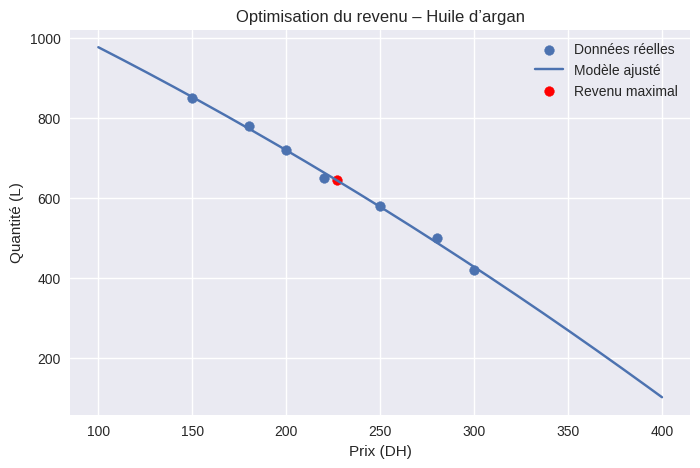

Prix optimal : 226.97 DH
Revenu maximal : 146075.21 DH


In [4]:
prix = np.array([150, 180, 200, 220, 250, 280, 300])
quantite = np.array([850, 780, 720, 650, 580, 500, 420])

def modele_poly(p, a, b, c):
    return a*p**2 + b*p + c

params, _ = curve_fit(modele_poly, prix, quantite)
a, b, c = params

def revenu_neg(p):
    return -(p * modele_poly(p, a, b, c))

res = minimize(
    revenu_neg,
    x0=200,
    bounds=[(100, 400)],
    method="L-BFGS-B"
)

p_opt = res.x[0]
R_max = -res.fun

p_range = np.linspace(100, 400, 300)
Q_fit = modele_poly(p_range, a, b, c)

plt.figure(figsize=(8,5))
plt.scatter(prix, quantite, label="Données réelles")
plt.plot(p_range, Q_fit, label="Modèle ajusté")
plt.scatter(p_opt, modele_poly(p_opt, a, b, c),
            color="red", label="Revenu maximal")
plt.xlabel("Prix (DH)")
plt.ylabel("Quantité (L)")
plt.legend()
plt.title("Optimisation du revenu – Huile d’argan")
plt.show()

print(f"Prix optimal : {p_opt:.2f} DH")
print(f"Revenu maximal : {R_max:.2f} DH")


## Exercice 1.4 : Optimisation d'un modèle de vente
**Niveau : ⭐⭐ Intermédiaire**

### Énoncé

Vous analysez la croissance d'une population bactérienne. Les données suivent un modèle exponentiel.

**Tâches :**

1. **Générez des données simulées :**
   ```python
   np.random.seed(42)
   t = np.linspace(0, 10, 20)  # Temps en heures
   # Modèle réel : N(t) = N0 * exp(r*t) avec N0=100, r=0.3
   N_reel = 100 * np.exp(0.3 * t)
   N_observe = N_reel + np.random.randn(20) * 50  # Ajout de bruit
   ```

2. **Définissez le modèle exponentiel :**
   ```python
   def modele_exp(t, N0, r):
       return N0 * np.exp(r * t)
   ```

3. **Ajustez le modèle aux données** avec `curve_fit()`

4. **Visualisez les résultats :**
   - Points : données observées
   - Courbe : modèle ajusté
   - Affichez les paramètres trouvés (N0 et r) dans la légende

5. **Comparez** les paramètres trouvés aux paramètres réels (N0=100, r=0.3)

## Exercice 1.5 : Interpolation de données climatiques
**Niveau : ⭐⭐ Intermédiaire**

### Énoncé
Un centre météorologique à Fès a enregistré les températures suivantes en 2024 :

```
Mois :        [1,  2,  3,  4,   5,   6,   7,   8,   9,  10,  11,  12]
Température : [12, 14, 17, 20, 24, 29, 34, 33, 28, 22, 17, 13] (en °C)
```

**Tâches :**

1. Utilisez `interp1d` pour créer trois fonctions d'interpolation :
   - Linéaire
   - Quadratique
   - Cubique

2. Générez des valeurs interpolées pour chaque jour de l'année (365 points)

3. Calculez et affichez pour chaque méthode :
   - La température estimée au 15 mars (jour 74)
   - La température estimée au 10 août (jour 222)

4. Créez une visualisation comparative montrant :
   - Les points de mesure originaux
   - Les trois courbes d'interpolation avec des couleurs différentes
   - Une légende claire

5. Analysez : quelle méthode semble la plus réaliste pour des données climatiques ?


## Exercice 1.6 : Analyse numérique complète
**Niveau : ⭐⭐⭐ Intermédiaire**

### Énoncé

Vous étudiez le mouvement d'un projectile. Ce problème mobilise plusieurs modules de SciPy.

**Partie A - Interpolation des données expérimentales :**

1. Vous disposez de mesures de la hauteur d'un projectile à différents instants :
   ```python
   t_mesure = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3])
   h_mesure = np.array([0, 11, 18, 21, 20, 15, 6])
   ```

2. Créez une fonction d'interpolation cubique

3. Estimez la hauteur à t = 1.25s et t = 2.25s

**Partie B - Résolution d'équation :**

4. Utilisez `root()` pour trouver l'instant où le projectile retombe au sol (h = 0), en partant de t=2.5

**Partie C - Intégration numérique :**

5. La vitesse verticale est donnée par : v(t) = 20 - 10*t (m/s)

6. Calculez la hauteur maximale atteinte en intégrant v(t) de 0 à 2s avec `quad()`

**Partie D - Visualisation :**

7. Tracez sur un même graphique :
   - Les points de mesure
   - La courbe interpolée
   - Le point d'impact au sol trouvé
   - Une ligne horizontale à la hauteur maximale calculée

# CHAPITRE 2 : Analyse scientifique et structures avancées

## Exercice 2.1 : Analyse statistique d'un dataset médical
**Niveau : ⭐⭐ Intermédiaire**

### Énoncé
Vous analysez les données de tension artérielle de 30 patients avant et après un traitement.

**Données :**
```python
avant = [145, 138, 152, 148, 155, 142, 149, 150, 147, 151,
         143, 146, 154, 141, 148, 153, 144, 147, 150, 146,
         149, 152, 145, 148, 151, 143, 147, 150, 144, 149]

apres = [138, 132, 145, 140, 148, 135, 142, 143, 140, 144,
         136, 139, 147, 134, 141, 146, 137, 140, 143, 139,
         142, 145, 138, 141, 144, 136, 140, 143, 137, 142]
```

**Tâches :**

1. Calculez pour chaque groupe (avant/après) :
   - Moyenne, médiane, écart-type
   - Utiliser `scipy.stats.describe()`

2. Testez si la différence est statistiquement significative :
   - Test t de Student pour échantillons appariés (`ttest_rel`)
   - Interprétez la p-value (seuil α = 0.05)

3. Vérifiez la normalité des distributions :
   - Utilisez `shapiro` test
   - Tracez les histogrammes

4. Calculez la corrélation entre avant et après (`pearsonr`)

5. Rédigez une conclusion : le traitement est-il efficace ?


## Exercice 2.2 : Analyse statistique avec scipy.stats
**Niveau : ⭐⭐ Intermédiaire**

### Énoncé

Vous analysez les résultats d'un examen passé par 200 étudiants.

**Tâches :**

1. **Génération des données :**
   ```python
   np.random.seed(42)
   notes = np.clip(np.random.normal(12, 3, 200), 0, 20)  # Notes entre 0 et 20
   ```

2. **Statistiques descriptives :**
   - Utilisez `stats.describe()` pour obtenir le résumé
   - Affichez la moyenne, la médiane et l'écart-type séparément

3. **Test de normalité :**
   - Utilisez `stats.normaltest()` pour vérifier si les notes suivent une loi normale
   - Interprétez le résultat (p-value)

4. **Ajustement d'une distribution :**
   - Utilisez `stats.norm.fit()` pour trouver les paramètres de la loi normale
   - Tracez l'histogramme des notes et superposez la PDF de la loi ajustée

5. **Calcul de probabilités :**
   - Quelle est la probabilité d'avoir une note > 15 ? (utilisez `cdf`)
   - Quelle note correspond au 90ème percentile ? (utilisez `ppf`)

## Exercice 2.3 : Matrices creuses et graphes
**Niveau : ⭐⭐⭐ Avancé**

### Énoncé
Vous analysez un réseau social d'une université de 1000 étudiants. Les connexions sont très clairsemées (chaque étudiant a en moyenne 15 amis).

**Tâches :**

1. Créez une matrice d'adjacence creuse 1000×1000 :
   - Générez aléatoirement 7500 connexions (15 amis × 1000 / 2)
   - Utilisez `csr_matrix` pour stocker
   - Assurez la symétrie (si A connaît B, alors B connaît A)

2. Calculez les statistiques du réseau :
   - Nombre de composantes connexes (`connected_components`)
   - Taille de la plus grande composante

3. Trouvez les "influenceurs" :
   - Calculez le degré de chaque nœud (nombre d'amis)
   - Affichez les 10 étudiants les plus connectés

4. Calculez le plus court chemin entre deux étudiants aléatoires :
   - Utilisez `dijkstra` ou `shortest_path`

5. Comparez la mémoire utilisée :
   - Matrice dense vs matrice creuse
   - Utilisez `sys.getsizeof()`

**Bonus :** Visualisez un sous-graphe de 50 étudiants avec `matplotlib`


## Exercice 2.4 : Matrices creuses et graphes
**Niveau : ⭐⭐⭐ Avancé**

### Énoncé

Vous analysez un réseau de transport entre 6 villes.

**Tâches :**

1. **Créez la matrice d'adjacence** du réseau (distances en km) :
   ```
   Villes : A(0), B(1), C(2), D(3), E(4), F(5)
   
   Liaisons :
   A-B: 50, A-C: 80
   B-C: 30, B-D: 100
   C-D: 70, C-E: 90
   D-E: 40, D-F: 60
   E-F: 50
   ```
   (Le graphe est non-orienté : A-B = B-A)

2. **Convertissez** la matrice en format CSR

3. **Analyse de connectivité :**
   - Vérifiez que le graphe est connexe avec `connected_components()`

4. **Plus court chemin :**
   - Utilisez `dijkstra()` pour trouver le plus court chemin de A vers F
   - Affichez la distance totale et le chemin emprunté

5. **Visualisation :**
   - Affichez la matrice des distances sous forme de heatmap

## Exercice 2.5 : Analyse spatiale de données GPS
**Niveau : ⭐⭐⭐ Avancé**

### Énoncé
Une société de livraison à Casablanca souhaite optimiser ses tournées. Vous disposez des coordonnées GPS de 20 clients.

**Données (latitude, longitude) :**
```python
clients = np.array([
    [33.5731, -7.5898], [33.5892, -7.6031], [33.5950, -7.6180],
    [33.5682, -7.6234], [33.5823, -7.6089], [33.5765, -7.5967],
    [33.5912, -7.6145], [33.5701, -7.6012], [33.5834, -7.6198],
    [33.5789, -7.5889], [33.5923, -7.6067], [33.5698, -7.6156],
    [33.5856, -7.5934], [33.5745, -7.6101], [33.5801, -7.6223],
    [33.5934, -7.5978], [33.5667, -7.6045], [33.5878, -7.6189],
    [33.5712, -7.5912], [33.5945, -7.6134]
])
```

**Tâches :**

1. Calculez la matrice de distances entre tous les clients :
   - Utilisez `distance_matrix` de `scipy.spatial`
   - Distance euclidienne sur les coordonnées

2. Créez un KDTree et trouvez pour chaque client :
   - Ses 3 voisins les plus proches
   - Tous les clients dans un rayon de 0.02 degrés

3. Calculez l'enveloppe convexe (`ConvexHull`) :
   - Identifiez les clients en périphérie
   - Calculez l'aire couverte

4. Créez un diagramme de Voronoi :
   - Divisez Casablanca en zones d'influence
   - Visualisez avec `matplotlib`

5. Proposez un algorithme simple de tournée :
   - Partez du dépôt (centre de gravité des points)
   - Visitez le plus proche voisin non visité
   - Calculez la distance totale


## Exercice 2.6 : Analyse spatiale de points géographiques
**Niveau : ⭐⭐⭐ Avancé**

### Énoncé

Vous analysez la répartition de 30 stations météo sur un territoire.

**Tâches :**

1. **Génération des données :**
   ```python
   np.random.seed(42)
   n_stations = 30
   positions = np.random.rand(n_stations, 2) * 100  # Coordonnées (x, y) en km
   temperatures = 15 + 5 * np.random.randn(n_stations)  # Températures en °C
   ```

2. **Recherche des plus proches voisins :**
   - Créez un `KDTree` avec les positions
   - Pour la station 0, trouvez les 3 stations les plus proches
   - Affichez leurs indices et distances

3. **Calcul des distances :**
   - Calculez la matrice de toutes les distances avec `distance_matrix()`
   - Trouvez les deux stations les plus éloignées l'une de l'autre

4. **Triangulation de Delaunay :**
   - Créez une triangulation de Delaunay des stations
   - Tracez les triangles et les points

5. **Enveloppe convexe :**
   - Calculez l'enveloppe convexe du réseau de stations
   - Affichez les stations qui forment le contour

6. **Visualisation finale :**
   - Tracez les stations (couleur = température)
   - Affichez la triangulation de Delaunay
   - Mettez en évidence l'enveloppe convexe

# CHAPITRE 3 : Applications scientifiques et préparation aux projets IA


## Exercice 3.1 : Nettoyage d'un signal audio bruité
**Niveau : ⭐⭐ Intermédiaire**

### Énoncé
Vous travaillez sur l'enregistrement d'une conférence universitaire perturbée par du bruit ambiant.

**Simulation du signal :**
```python
# Signal original : voix humaine (fréquences 100-300 Hz)
t = np.linspace(0, 10, 10000)
voix = np.sin(2 * np.pi * 150 * t) + 0.5 * np.sin(2 * np.pi * 250 * t)

# Bruit haute fréquence (ventilation, équipement)
bruit_hf = 0.8 * np.sin(2 * np.pi * 2000 * t)

# Bruit basse fréquence (ronronnement électrique 50 Hz)
bruit_bf = 0.6 * np.sin(2 * np.pi * 50 * t)

# Bruit aléatoire
bruit_random = np.random.normal(0, 0.3, len(t))

# Signal enregistré
signal_bruite = voix + bruit_hf + bruit_bf + bruit_random
```

**Tâches :**

1. Supprimez la tendance du signal avec `signal.detrend`

2. Appliquez la FFT pour analyser les fréquences :
   - Identifiez les pics de fréquence
   - Créez un spectre de puissance

3. Filtrez le signal :
   - Supprimez les fréquences < 80 Hz (bruit électrique)
   - Supprimez les fréquences > 400 Hz (bruit aigu)
   - Conservez la bande 80-400 Hz

4. Reconstruisez le signal avec la FFT inverse

5. Visualisez (4 sous-graphiques) :
   - Signal original bruité
   - Spectre avant filtrage
   - Spectre après filtrage
   - Signal nettoyé

6. Calculez le rapport signal/bruit (SNR) avant et après


## Exercice 3.2 : Analyse d'un signal avec la FFT
**Niveau : ⭐⭐ Intermédiaire**

### Énoncé

Vous analysez un signal audio composé de plusieurs fréquences mélangées avec du bruit.

**Tâches :**

1. **Création du signal :**
   ```python
   np.random.seed(42)
   fs = 1000  # Fréquence d'échantillonnage (Hz)
   t = np.linspace(0, 1, fs)  # 1 seconde
   
   # Signal composé de 3 sinusoïdes : 50 Hz, 120 Hz, 300 Hz
   signal_pur = 3*np.sin(2*np.pi*50*t) + 1.5*np.sin(2*np.pi*120*t) + 0.8*np.sin(2*np.pi*300*t)
   
   # Ajout de bruit
   bruit = np.random.randn(len(t)) * 2
   signal_bruite = signal_pur + bruit
   ```

2. **Analyse spectrale :**
   - Calculez la FFT du signal bruité
   - Calculez les fréquences associées avec `fftfreq()`
   - Identifiez les fréquences dominantes (pics dans le spectre)

3. **Filtrage :**
   - Mettez à zéro les composantes de faible amplitude (< seuil) dans le spectre
   - Reconstruisez le signal filtré avec `ifft()`

4. **Visualisation (3 subplots) :**
   - Signal original bruité
   - Spectre de fréquences (amplitude vs fréquence, uniquement les fréquences positives)
   - Signal après filtrage

## Exercice 3.3 : Détection de contours dans une image médicale
**Niveau : ⭐⭐⭐ Avancé**

### Énoncé
Vous développez un outil d'aide au diagnostic pour détecter des anomalies sur des radiographies pulmonaires.

**Tâches :**

1. Créez une image synthétique simulant une radiographie (256×256) :
   - Fond gris uniforme (valeur 100)
   - Ajoutez 3 cercles de différentes tailles (poumons + anomalie)
   - Ajoutez du bruit gaussien (`np.random.normal`)

2. Prétraitement de l'image :
   - Appliquez un filtre gaussien (`ndimage.gaussian_filter`)
   - Testez différentes valeurs de sigma (1, 2, 5)

3. Détection de contours :
   - Calculez le gradient avec `ndimage.sobel`
   - Appliquez un seuillage pour isoler les contours nets
   - Utilisez `ndimage.binary_closing` pour combler les gaps

4. Segmentation des régions :
   - Utilisez `ndimage.label` pour identifier les zones connexes
   - Comptez le nombre de structures détectées
   - Calculez l'aire de chaque structure

5. Analyse morphologique :
   - Érosion et dilatation pour affiner les contours
   - Comparaison avant/après

6. Visualisation complète :
   - Image originale
   - Image filtrée
   - Contours détectés
   - Régions segmentées (avec labels colorés)

**Bonus :** Calculez le centre de masse de chaque structure avec `ndimage.center_of_mass`


## Exercice 3.4 : Traitement d'image avec scipy.ndimage
**Niveau : ⭐⭐⭐ Avancé**

### Énoncé

Vous préparez des images binaires pour un algorithme de détection d'objets.

**Taches :**

1. **Création d'une image de test :**
   ```python
   np.random.seed(42)
   
   # Image 64x64 noire
   image = np.zeros((64, 64))
   
   # Ajout de formes géométriques (rectangles blancs)
   image[10:25, 10:30] = 1  # Rectangle 1
   image[35:55, 25:50] = 1  # Rectangle 2
   image[15:20, 45:55] = 1  # Rectangle 3
   
   # Ajout de bruit (pixels parasites)
   bruit = np.random.random((64, 64)) > 0.95  # 5% de pixels blancs aléatoires
   image_bruitee = np.maximum(image, bruit)
   ```

2. **Nettoyage morphologique :**
   - Appliquez `binary_opening()` pour supprimer les petits artefacts
   - Appliquez `binary_closing()` pour combler les petits trous

3. **Filtrage gaussien :**
   - Appliquez un filtre gaussien avec `gaussian_filter()` (sigma=1)
   - Binarisez le résultat avec un seuil de 0.5

4. **Visualisation (2x2 subplots) :**
   - Image originale
   - Image bruitée
   - Image après opening/closing
   - Image après filtrage gaussien

5. **Analyse :**
   - Comptez le nombre de pixels blancs dans chaque image
   - Commentez les différences entre les méthodes de nettoyage

## Exercice 3.5 : Mini-projet - Classification Iris avec préparation SciPy
**Niveau : ⭐⭐⭐ Avancé (Projet intégratif)**

### Énoncé
Créez un pipeline complet d'analyse du célèbre dataset Iris en utilisant exclusivement SciPy (sans Scikit-learn).

**Objectif :** Classifier les espèces d'iris en utilisant une approche K-Nearest Neighbors (KNN) manuelle.

**Tâches :**

### Partie 1 : Chargement et exploration (scipy.datasets)
1. Chargez le dataset Iris
2. Affichez les statistiques descriptives complètes (`scipy.stats.describe`)
3. Vérifiez la distribution de chaque variable (test de normalité)
4. Calculez la matrice de corrélation entre toutes les features

### Partie 2 : Analyse spatiale (scipy.spatial)
1. Créez un KDTree avec les 4 features
2. Pour chaque échantillon, trouvez ses k=5 plus proches voisins
3. Implémentez un vote majoritaire pour prédire l'espèce
4. Utilisez 80% des données pour "entraînement", 20% pour test

### Partie 3 : Optimisation des hyperparamètres (scipy.optimize)
1. Créez une fonction d'accuracy en fonction de k (nombre de voisins)
2. Testez k de 1 à 20
3. Trouvez le k optimal qui maximise l'accuracy
4. Visualisez la courbe accuracy vs k

### Partie 4 : Analyse statistique des résultats (scipy.stats)
1. Calculez la matrice de confusion manuellement
2. Pour chaque classe, calculez :
   - Précision
   - Rappel
   - F1-score
3. Effectuez un test statistique pour comparer les performances entre classes

### Partie 5 : Visualisation et rapport
1. Créez 4 graphiques :
   - Distribution des features par espèce (boxplots)
   - Matrice de distances (heatmap)
   - Projection 2D (2 meilleures features)
   - Courbe de performance vs k

2. Rédigez un mini-rapport (format Markdown) incluant :
   - Statistiques descriptives
   - Meilleur k trouvé
   - Accuracy globale
   - Analyse des erreurs de classification

### Contraintes
- N'utilisez QUE les modules SciPy (+ NumPy, Matplotlib, Pandas pour viz)
- Implémentez KNN manuellement (pas de Scikit-learn)
- Commentez abondamment votre code
- Temps estimé : 3-4 heures


## Exercice 3.6 : Projet intégré - Analyse de données de capteurs IoT
**Niveau : ⭐⭐⭐ Avancé (Projet intégratif)**

### Énoncé

Vous travaillez sur un projet de maintenance prédictive. Vous disposez de données de vibration d'une machine industrielle. Vous devez analyser ces signaux pour détecter des anomalies.

**Données simulées :**
```python
np.random.seed(42)

# Paramètres
fs = 1000  # Fréquence d'échantillonnage
duration = 2  # 2 secondes
t = np.linspace(0, duration, fs * duration)

# Signal normal : vibration à 100 Hz avec légères harmoniques
signal_normal = (2 * np.sin(2*np.pi*100*t) +
                 0.5 * np.sin(2*np.pi*200*t) +
                 np.random.randn(len(t)) * 0.3)

# Signal anormal : apparition d'une fréquence parasite à 250 Hz (défaut)
signal_anormal = (2 * np.sin(2*np.pi*100*t) +
                  0.5 * np.sin(2*np.pi*200*t) +
                  1.5 * np.sin(2*np.pi*250*t) +  # Fréquence de défaut
                  np.random.randn(len(t)) * 0.3)
```

**Tâches :**

1. **Prétraitement :**
   - Supprimez la tendance des deux signaux avec `signal.detrend()`

2. **Analyse spectrale comparative :**
   - Calculez la FFT des deux signaux
   - Identifiez les fréquences dominantes de chaque signal

3. **Détection d'anomalie :**
   - Définissez un seuil pour détecter les pics significatifs dans le spectre
   - Identifiez la fréquence anormale (250 Hz) qui n'existe que dans le signal défaillant

4. **Statistiques descriptives :**
   - Utilisez `stats.describe()` pour comparer les deux signaux
   - Comparez les variances et les valeurs extrêmes

5. **Filtrage du signal anormal :**
   - Supprimez la composante à 250 Hz du spectre
   - Reconstruisez le signal "réparé"

6. **Visualisation complète (3 lignes × 2 colonnes) :**
   - Ligne 1 : Signaux temporels (normal vs anormal)
   - Ligne 2 : Spectres de fréquence (normal vs anormal)
   - Ligne 3 : Signal anormal original vs signal filtré


---
# Ressources
- https://scipy.org/


> **Prochaine séance :**
> * Pandas —

Bon courage à tous, et surtout : codez, cassez, réparez, recommencez.  

C’est comme ça qu’on devient bon en **Data Science**.

À la semaine prochaine inchae ALLAH !

<br>
<hr>
<div style="font-size:14px; line-height:1.5;">
<strong style="font-size:16px;">Y. EL ALLIOUI</strong><br>
<span style="color:#555;">FPK – USMS</span><br>
<a href="mailto:y.elallioui@usms.ma" style="color:#2c3e50; text-decoration:none;">
y.elallioui@usms.ma
</a>
</div>